In [49]:
#sideris

# Corporate Prosecution - Exercise B

#### Summary

Looking at corporate prosecutions over time, and the possible assignment of a compliance officer.

#### Files

- cpr-data.xls, "detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990"

#### Data Source(s)

The UVA School of Law publishees a [Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

> The goal of this Corporate Prosecutions Registry is to provide comprehensive and up-to-date information on federal organizational prosecutions in the United States, so that we can better understand how corporate prosecutions are brought and resolved. We include detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990.

[Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

#### Skills

- Working with CSV files
- Counting and summarizing columns
- Searching with strings
- Extracting with strings

# Read in `cpr-data.csv`

In [50]:
import pandas as pd
% matplotlib inline

df = pd.read_csv("cpr-data.csv")
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,272734,12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2003,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,24000,nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2014,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,14640,nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2006,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,25000,nan,0,2500,27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN


### Check that your dataframe has 3038 rows and 56 columns.

In [51]:
df.shape

(3038, 56)

### List the columns and their data types

In [52]:
df.dtypes

REC_ID                                                                      int64
COMPANY                                                                    object
DISPOSITION_TYPE                                                           object
PRIMARY_CRIME_CODE                                                         object
SWISS_BANK_PROGRAM                                                         object
USAO                                                                       object
COUNTRY                                                                    object
FINANCIAL_INSTITUTION                                                      object
CASE_NAME                                                                  object
CASE_ID                                                                    object
DOCKET_NO                                                                  object
DATE                                                                       object
JUDGMENT_DATE   

### What do the following columns mean?

- PRIMARY_CRIME_CODE
- DISPOSITION_TYPE
- AGREEMENT_TYPE
- COUNTRY
- FINE
- TOTAL_PAYMENT
- USAO
- PROBATION_LENGTH
- AGREEMENT_REQUIRED_NEW_POSITIONS
- INDEP_MONITOR_REQUIRED

In [53]:
# PRIMARY_CRIME_CODE - types of crime.
# DISPOSITION_TYPE -  indicates whether the prosecution was resolved through a type of agreement.
# AGREEMENT_TYPE -  indicates whether the agreement is a plea ("plea"), non-prosecution agreement ("NP"), or deferred prosecution agreement ("DP")
# COUNTRY - country in which the entity was incorporated.
# FINE - amount of fine in U.S. dollars.
# TOTAL_PAYMENT - Sum of all monetary penalties (i.e. fines, restitution, forfeiture, disgorgements, community service, etc.)
# PRIMARY_CRIME_CODE - Type of crime commited
# INDEP_MONITOR_REQUIRED - Whether or not the agreement recquires retaining and independent actor to retained for monitoring ????
# AGREEMENT_REQUIRED_NEW_POSITIONS - Agreement recquires new positions to be created
# PROBATION_LENGTH - Length of probation in months.
# USAO - Which U.S. Attorney's Offices were involved in the prosecution

# Customizing the display in pandas

See how the middle of the table has a `...`? Let's fix that.

## How do you see the number of columns pandas will display?

In [54]:
pd.options.display.max_columns

65

## Set pandas to display 65 columns

In [55]:
pd.set_option("display.max_columns", 65)
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,272734,12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2003,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,24000,nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2014,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,14640,nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2006,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,25000,nan,0,2500,27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN


## How do you see the number of rows pandas will display? Then, set it to display 100 rows at a time.

What does "the number rows pandas will display" actually mean?

In [56]:
pd.options.display.max_rows
pd.set_option("display.max_rows", 100)
df

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0,272734,12,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2003,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,24000,nan,36,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0,0,50,0,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2014,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,14640,nan,36,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2006,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,25000,nan,0,2500,27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN
5,823,4628 Group Inc.,plea,Environmental,NaN,New York - Northern District,United States,No,USA v. 4628 Group Inc.,5:00-cr-00441,8,2001-07-31,2001-07-31,2000-09-20,NaN,No,0,nan,500000,0,24,0,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2001,PACER,NaN
6,824,"70 North, LLC",plea,Environmental,NaN,Alaska,United States,No,USA v. 70 North LLC,4:13-po-00001,NaN,2013-03-05,2013-03-05,NaN,NaN,No,35,0,2000,0,0,0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2013,PACER,NaN
7,825,806 Trading Corp.,plea,Other,NaN,New Jersey,United States,No,USA v. 806 TRADING CORPORATION,2:11-cr-00579,8,2012-03-05,2012-03-05,2011-09-06,NaN,No,0,0,42000,0,0,0,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2012,PACER,NaN
8,2530,"83rd & Union Hills, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Manageme

## Describe the TOTAL_PAYMENT column to me numerically - maxes, mins, averages.

Do this in **one line.**

In [57]:
df['TOTAL_PAYMENT'].describe()

count         3038
mean      22842732
std      155697740
min              0
25%          21892
50%         200000
75%        2100000
max     4486800000
Name: TOTAL_PAYMENT, dtype: float64

### Oh that's ugly ugly ugly. Set pandas to format floats with 2 decimal points, we probably don't need to be more specific than that. Oh, and tell it to use a `,` in the thousands position!

I'm just going to leave [this here](http://infohost.nmt.edu/~shipman/doc/python27/web/new-str-format.html) for reference. You should definitely come up and ask on the board, though.

In [58]:
pd.set_option("display.float_format", "{:.0f}".format)
df['TOTAL_PAYMENT'].describe()

count         3038
mean      22842732
std      155697740
min              0
25%          21892
50%         200000
75%        2100000
max     4486800000
Name: TOTAL_PAYMENT, dtype: float64

## Look at the fine and the forfeiture disgorgement for the first two rows. Pretty nice!

In [59]:
df['FINE'].head(2)

0       0
1   24000
Name: FINE, dtype: float64

In [60]:
df['FORFEITURE_DISGORGEMENT'].head(2)

0   272734
1      nan
Name: FORFEITURE_DISGORGEMENT, dtype: float64

# A little summarizing

## How many of cases actually went to trial? How did most of these cases arrive at a decision?

In [61]:
df['JUDGMENT_DATE'].describe()

count           2532
unique          1709
top       2014-11-21
freq              18
Name: JUDGMENT_DATE, dtype: object

In [62]:
df['DISPOSITION_TYPE'].value_counts()

plea               2565
NP                  266
DP                  201
declination           2
trial convicton       2
dismissal             2
Name: DISPOSITION_TYPE, dtype: int64

### Graph the previous answer, with the longest bar on top

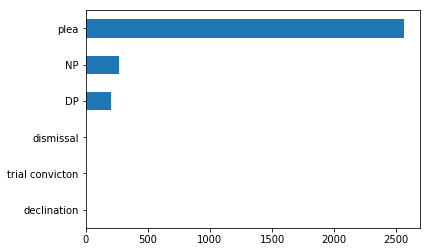

In [63]:
df['DISPOSITION_TYPE'].value_counts().sort_values().plot(kind='barh')

## What's the distribution of total payments look like?

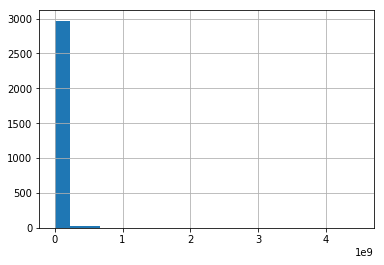

In [64]:
df['TOTAL_PAYMENT'].hist(bins = 20)

## Sort by total payments, descending

In [65]:
df.sort_values(by = 'TOTAL_PAYMENT', ascending = False)

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
307,2548,BNP Paribas S.A.,plea,Import / Export,NaN,"New York - Southern District,USDOJ - Criminal ...",France,Yes,USA v. BNP Paribas S.A.,1:14-cr-00460,54,2015-05-01,2015-05-01,2014-07-10,NaN,No,400,0,140000000,4346800000,60,0,4486800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2015,PACER,NaN
309,983,"BP Exploration & Production, Inc.",plea,Environmental,NaN,Louisiana - Eastern District,non - U.S.,No,"USA v. BP Exploration and Production, Inc",2:12-cr-00292,65,2013-01-29,2013-01-29,2013-01-30,NaN,Yes,0,2744000000,1256000000,0,60,0,4000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2013,PACER,NaN
2913,3147,Volkswagen AG,plea,Fraud - General,NaN,Michigan - Eastern District,German,No,USA v. Liang et al.,2:16-cr-20394,NaN,2017-04-21,2017-04-21,NaN,NaN,Yes,nan,nan,2800000000,nan,nan,nan,2800000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2017,PACER,NaN
1000,2801,"Evergreen International, S.A.",plea,Act to Prevent Pollution from Ships,NaN,USDOJ - Criminal Division (California - Centra...,United States,No,"USA v. Evergreen Int, S.A.",2:05-cr-00238,27,2005-04-20,2005-04-20,2005-04-20,NaN,No,nan,2000000000,3000000,nan,nan,nan,2003000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2005,PACER,NaN
753,2570,Credit Suisse,plea,Fraud - Tax,NaN,Virginia - Eastern District,non - U.S.,Yes,USA v. Credit Suisse AG,1:14-cr-00188,47,2014-11-21,2014-11-21,2014-05-19,CS,Yes,0,0,1136988986,0,nan,666500000,1803488986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2014,PACER,NaN
1454,757,"JPMorgan Chase Bank, N.A.",DP,Bank Secrecy Act,No,New York - Southern District,United States,Yes,NaN,NaN,NaN,2014-01-06,NaN,NaN,NaN,Yes,0,0,0,1700000000,24,0,1700000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2014,NaN,NaN
2167,451,Pharmacia & Upjohn,plea,Fraud - Health Care,NaN,Massachusetts,United States,No,USA v. Pharmacia & Upjohn Company Inc.,1:07-cr-10099,11,2007-04-26,2007-04-26,2007-04-03,NaN,Yes,nan,nan,1195000000,nan,0,105000000,1300000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,2007,PACER,NaN
1238,64,"HSBC Bank USA, N.A. & HSBC Holdings plc",DP,Bank Secrecy Act,No,"New York - Eastern District,USDOJ - Criminal D...",United Kingdom,Yes,NaN,NaN,NaN,2012-12-11,NaN,NaN,NaN,Yes,1256000000,nan,0,nan,60,1256000000,1256000000

# Column selection

We wanted to view all of those rows, but honestly that's a little silly. **We can't actually see the data we want!** Let's just select the ones we care about.

## Create a new dataframe that only includes the company name, disposition type, total payment, and date.

In [66]:
columns = ['COMPANY', 'DISPOSITION_TYPE', 'TOTAL_PAYMENT', 'DATE']
new_df = pd.read_csv('cpr-data.csv', usecols = columns)
new_df

,COMPANY,DISPOSITION_TYPE,DATE,TOTAL_PAYMENT
0,"1st Union Transfer and Telegraph, Inc.",plea,2003-06-17,272734
1,"3D Poultry Loading, Inc.",plea,2005-01-25,24000
2,"3rd & Bell, LLC",plea,2014-11-21,50
3,41 Market Inc.,plea,2006-07-05,14640
4,"45,000, Inc.",plea,2005-06-03,27500
5,4628 Group Inc.,plea,2001-07-31,500000
6,"70 North, LLC",plea,2013-03-05,2000
7,806 Trading Corp.,plea,2012-03-05,42000
8,"83rd & Union Hills, LLC",plea,2014-11-24,50
9,"84th & Bell, LLC",plea,2014-11-24,50


## Confirm it has 3038 rows and 4 columns

In [67]:
new_df.shape

(3038, 4)

## Using this subset, extract the year into a separate column called `year`

Your machine will complain. **Let's talk about that error.**

In [68]:
new_df['YEAR'] = new_df['DATE'].str.extract(r'(\d{4})')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [69]:
new_df

,COMPANY,DISPOSITION_TYPE,DATE,TOTAL_PAYMENT,YEAR
0,"1st Union Transfer and Telegraph, Inc.",plea,2003-06-17,272734,2003
1,"3D Poultry Loading, Inc.",plea,2005-01-25,24000,2005
2,"3rd & Bell, LLC",plea,2014-11-21,50,2014
3,41 Market Inc.,plea,2006-07-05,14640,2006
4,"45,000, Inc.",plea,2005-06-03,27500,2005
5,4628 Group Inc.,plea,2001-07-31,500000,2001
6,"70 North, LLC",plea,2013-03-05,2000,2013
7,806 Trading Corp.,plea,2012-03-05,42000,2012
8,"83rd & Union Hills, LLC",plea,2014-11-24,50,2014
9,"84th & Bell, LLC",plea,2014-11-24,50,2014


## Make the 'year' column an integer.

Or at least *try*, then turn it into a float. Why did one work but the other didn't?

In [70]:
new_df['YEAR'] = new_df['YEAR'].astype(float)

## Make a histogram of cases over the years

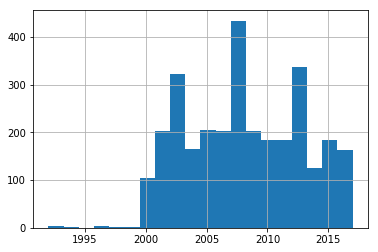

In [71]:
new_df['YEAR'].hist(bins = 20)

## What was the total amount paid across all cases each year?

In [72]:
new_df.groupby('YEAR')['TOTAL_PAYMENT'].sum()

YEAR
1992             0
1993             0
1994             0
1996             0
1998             0
1999             0
2000     278206161
2001     761777886
2002     829424749
2003     911162220
2004    1637537063
2005    4210235461
2006    1201775794
2007    3034830498
2008    2729966187
2009    4090513821
2010    4745389066
2011    2957950912
2012    6696816915
2013    7724920476
2014    7062535053
2015    9844845643
2016    3808529923
2017    6866002335
Name: TOTAL_PAYMENT, dtype: int64

## Graph it!

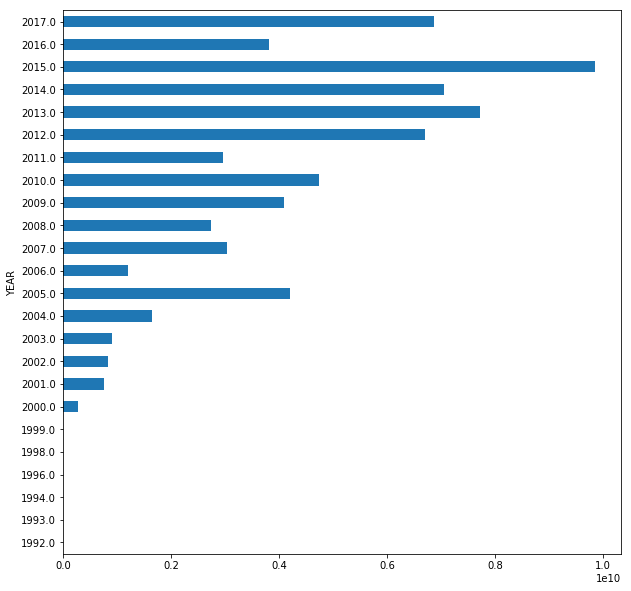

In [73]:
new_df.groupby('YEAR')['TOTAL_PAYMENT'].sum().plot(kind = 'barh', figsize = (10,10))

# Cleaning up a column

Take a look at **AGREEMENT_REQUIRED_NEW_POSITIONS** in your **ORIGINAL DATAFRAME**. How many times does it have a value in it?

- Tip: There are a few ways to do this. Maybe you want to ask for an easy one!

In [74]:
len(df[df['AGREEMENT_REQUIRED_NEW_POSITIONS'].notnull()])

261

### What are the top 5 responses for `AGREEMENT_REQUIRED_NEW_POSITIONS`?

In [75]:
df['AGREEMENT_REQUIRED_NEW_POSITIONS'].value_counts().head(5)

No                                                                                       163
Yes; Assignment one or more senior officers to compliance, with reporting obligations     46
Yes; Chief Compliance Officer                                                              6
Yes; Compliance Officer                                                                    6
Yes; Compliance officer                                                                    3
Name: AGREEMENT_REQUIRED_NEW_POSITIONS, dtype: int64

## That looks messy.

### HOLD ON, time to learn something

**There are a few ways to do the next question**, but a couple popular methods will have pandas yell at you. You might want to try this new thing called `loc`! **It is used to update a column in a row based on a condition.**

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `df.country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

## Start to this up by creating a new column called `required_new_position`.

This column should be `True` if a new position was required, `False` if a new position was not required, and `NaN` if it's unknown.

- Tip: You should use `.str.contains`
- Tip: Do you know how to say "at the start of a line" using regex?
- Tip: We've talked about how to avoid `cannot index with vector containing NA / NaN values` but if you get it feel free to write it on the board

In [76]:
df.loc[df.AGREEMENT_REQUIRED_NEW_POSITIONS.str.contains(r'^Yes', na = False), 'required_new_position'] = True

In [77]:
df.loc[df.AGREEMENT_REQUIRED_NEW_POSITIONS.str.contains(r'^No', na = False), 'required_new_position'] = False

### Confirm that your new column has 163 `True` values and 98 `False` values

In [78]:
df['required_new_position'].value_counts()

False    163
True      98
Name: required_new_position, dtype: int64

## Extract the position name into a new column called `new_position`

In [79]:
df['new_position'] = df['AGREEMENT_REQUIRED_NEW_POSITIONS'].str.extract("^Yes; (.+)")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [80]:
df['new_position']

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
5                                                     NaN
6                                                     NaN
7                                                     NaN
8                                                     NaN
9                                                     NaN
10                                                    NaN
11                                                    NaN
12                                                    NaN
13                                                    NaN
14                                                    NaN
15                                                    NaN
16                                                    NaN
17            

## Make sure you extracted correctly

The line below should show at least SIX rows. If it doesn't show any rows, something went wrong!

- Tip: A `.value_counts()` might look okay, even though something is a little off.

In [81]:
df[df.new_position == "Compliance Officer"]

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position
441,663,Boeing Co.,NP,Fraud - General,No,"California - Central District,Virginia - Easte...",United States,No,NaN,NaN,NaN,2006-06-01,NaN,NaN,NaN,Yes,0,nan,50000000,nan,24,nan,50000000,Yes,Yes; Compliance Officer,No,Yes (RICO - possession of competitor documents...,NaN,Training; discipline; prohibiting retaliation;...,Yes,Yes; Interim Agreement with Air Force: maintai...,"Federal procurement fraud, conflict of interes...",NaN,Yes; in exchange for good faith performance of...,"No; But ""conduct by a Boeing employee classifi...",No,"$50M penalty, $565M civil settlement; $1.9M to...",Yes,Yes; Periodic auditing of compliance program,Interim Admin. Agmt.,No,Yes,Yes,Yes,Yes,Yes; Changes to ethics and compliance program;...,No,1900000,595000000,National Aeronautics and Space Administration ...,Yes,596900000,No,2006,NaN,Information regarding the Interim Agreement: h...,True,Compliance Officer
664,587,"Columbia Farms, Inc.",DP,Immigration,No,South Carolina,United States,No,NaN,NaN,NaN,2009-11-03,NaN,NaN,NaN,No,1500000,nan,0,nan,24,1500000,1500000,Yes,Yes; Compliance Officer,No,NaN,NaN,Designation of compliance officer; ICE reporti...,Yes,NaN,"Immigration, false statements",NaN,"Yes; acceptance of responsibility, compliance,...",Yes,No,$1.5M,No,"Yes; Use of e-Verify program, annual review of...",NaN,No,No,No,NaN,Yes,Yes; Cites significant remedial actions taken ...,No,nan,nan,Dept. of Homeland Security;Dept. of Homeland S...,Yes,0,No,2009,NaN,NaN,True,Compliance Officer
1063,51,Fisher Sand & Gravel / General Steel (subsid.)...,DP,Fraud - Tax,No,USDOJ - Tax Division,United States,No,NaN,NaN,NaN,2009-04-29,NaN,NaN,NaN,No,668141,nan,500000,nan,30,668141,1168141,Yes,Yes; Compliance Officer,No,NaN,NaN,Designate Compliance Officer to oversee implem...,Yes,Yes,Tax fraud,NaN,"Yes; acceptance of responsibility, cooperation...",Yes,No,"$668,141 restitution for unpaid lax liability;...",No,Yes; Compliance Officer must evaluate periodic...,NaN,No,No,No,NaN,Yes,Yes; Drafted a Code of Business Ethics,No,nan,nan,Dept. of the Treasury - Internal Revenue Servi...,Yes,0,No,2009,NaN,NaN,True,Compliance Officer
1657,609,Louis Berger Group,DP,Fraud - General,No,New Jersey,United States,Yes,NaN,NaN,NaN,2010-11-05,NaN,NaN,NaN,No,0,nan,18700000,nan,24,nan,18700000,Yes,Yes; Compliance Officer,No,NaN,NaN,"Complaince, training, hotline, new compliance ...",Yes,No,Major Frauds Statute,NaN,"Yes; acceptance of responsibility, cooperation...",Yes,No,NaN,Yes,No,NaN,Yes; New obligations of CFO),Yes,No,No,Yes,"Yes; ""extensive reforms and remedial measures""...",No,nan,nan,Dept. of Justice - Civil Division - Fraud Sect...,Yes,0,No,2010,NaN,NaN,True,Compliance Officer
1661,610,"Love Irrigation, Inc.",DP,Immigration,No,Mississippi -

## Find all cases that required a compliance officer

That one above only gives us six. We want more! **Find at least 23 cases that required the creation of a compliance officer.**

- Tip: Regular expressions might be your friend here
- Tip: If you get an error about **new_position** not being found, change your code from when you created the column from `df.new_position = ...` to `df['new_position'] = ...`

In [82]:
df['new_position'].str.contains('compliance officer', na = False, case = False).value_counts()

False    3009
True       29
Name: new_position, dtype: int64

## View the cases that have a compliance officer again.

This time you shouldn't have a `...` in the middle of your dataframe.

In [83]:
df[df['new_position'].str.contains('compliance officer', na = False, case = False)]

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position
226,572,Appalachian Oil,DP,Fraud - General,No,Virginia - Western District,United States,No,NaN,NaN,NaN,2007-01-31,NaN,NaN,NaN,Yes,255000,nan,0,nan,36,255000,255000,Yes,Yes; Compliance officer,No,Yes (racketeering/RICO action - R.J. Reynolds ...,2500000,"Retaining compliance officer, training, superv...",Yes,No,Wire fraud,NaN,No,Yes,NaN,"$255,000 civil forfeiture, $2.5 million civil ...",No,No,NaN,No,Yes,Yes,NaN,No,No; None cited,Yes,nan,nan,None,Yes,0,No,2007,NaN,NaN,True,Compliance officer
276,655,"Atrium Companies, Inc.",NP,Immigration,No,Texas - Southern District,United States,No,NaN,NaN,NaN,2012-01-01,NaN,NaN,NaN,No,2000000,nan,0,nan,nan,2000000,2000000,NaN,Yes; Chief Compliance Officer,NaN,Yes (writ of attachment for $5 million and inj...,Unknown (couldn't find any information except ...,Hire full time chief compliance officer and co...,Yes,No,Immigration,NaN,.,NaN,NaN,"$2,000,000 to Department of Homeland Security ...",No,NaN,NaN,NaN,No,Yes,NaN,Yes,Yes; Substantial remedial measures; revising i...,NaN,nan,nan,Dept. of Homeland Security - Immigration & Cus...,NaN,0,NaN,2012,FOIA request,NaN,True,Chief Compliance Officer
278,656,Aurora Foods,NP,Fraud - Accounting,No,New York - Southern District,United States,No,NaN,NaN,NaN,2001-01-22,NaN,NaN,NaN,Yes,0,nan,0,nan,nan,nan,0,No,"Yes; Compliance officer, two independent and o...",No,Yes (class action and derivative lawsuits: Ste...,26350000,New policies; confidential reporting by employ...,Yes,No,Accounting fraud,NaN,"Yes; immediate reporting, cooperation, complia...",Yes,No,None listed,Yes,No,NaN,No,Yes,Yes,Yes; SEC (enjoined from violations of SEA see ...,Yes,Yes; Immediate disclosure; voluntary cooperati...,Yes,0,0,Securities and Exchange Commission (SEC),No,0,No,2001,NaN,NaN,True,"Compliance officer, two independent and outsid..."
305,583,BL Trading,DP,Fraud - General,No,Massachusetts,United States,Yes,NaN,NaN,NaN,2010-12-01,NaN,NaN,NaN,No,182405,nan,0,nan,24,182405,182405,Yes,Yes; Designate CEO as Compliance officer,No,NaN,NaN,Establishment of Compliance officer; establish...,Yes,No,Wire fraud; sale and receipt of stolen propert...,NaN,"Yes; acceptance of responsibility, present own...",Yes,No,$182404.75 restitution,No,No,NaN,No,No,No,NaN,No,No; None cited,No,nan,nan,None,Yes,0,No,2010,NaN,NaN,True,Designate CEO as Compliance officer
362,754,"Bashas, Inc.",NP,Food,No,Arizona,United States,No,NaN,NaN,NaN,2013-08-30,NaN,NaN,NaN,No,nan,nan,0,nan,24,1472487,1472487,Yes,Yes; Chief Compliance Officer,No,NaN,NaN,Imposing discipline on involved employees; new...,Yes,No,Food-related USDA violations (mislabeling meat),NaN,"Yes; cooperation, acknowledging responsibility...",Yes,No,$1.47 million went to Tuscon Community Food Ba...,No,No,NaN,No,

## What were the most popular crimes that required a compliance officer's appointment?

In [84]:
df_co = df[df['new_position'].str.contains('compliance officer', na = False, case = False)]

In [85]:
df_co['PRIMARY_CRIME_CODE'].value_counts()

Fraud - General        5
Kickbacks              5
Immigration            5
Fraud - Tax            3
FCPA                   3
Fraud - Health Care    2
Fraud - Securities     2
Environmental          1
Other                  1
Food                   1
Fraud - Accounting     1
Name: PRIMARY_CRIME_CODE, dtype: int64

# Make a comparison between two groups in the full dataset

For example, "cases before 2003 were likely to be about this, but after 2003 they became about something else."

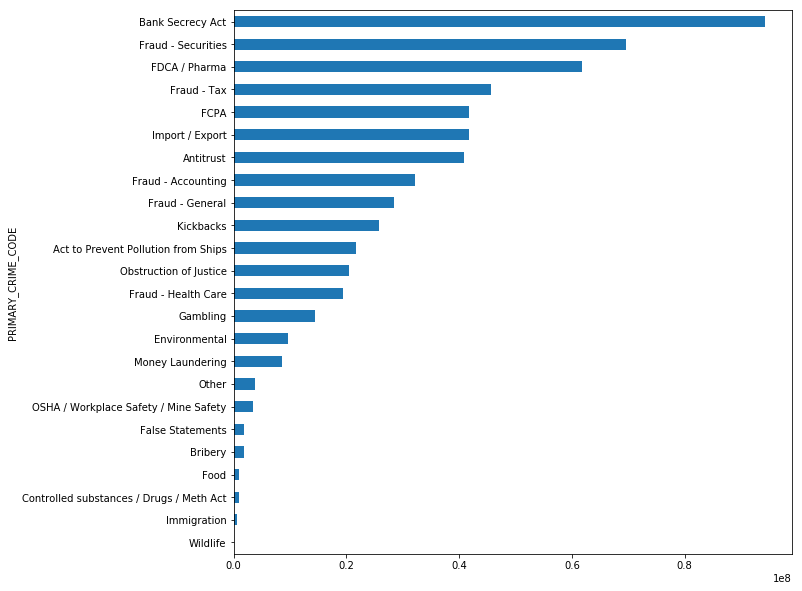

In [86]:
df.groupby('PRIMARY_CRIME_CODE')['TOTAL_PAYMENT'].mean().sort_values().plot(kind = 'barh', figsize = (10,10))